In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
auto_foot_graph_arh_obl = gpd.read_file('data/auto_foot_graph_arh_obl.geojson')

In [7]:
data = auto_foot_graph_arh_obl
data.head(3)

,OBJECTID,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,auto,foot,meters,minutes,minutes_foot,geometry
0,29271,bridleway,,,B,0,0.0,F,F,N,Y,2060.383262,NaN,27.471777,"MULTILINESTRING ((5087051.262 9580496.953, 508..."
1,37927,bridleway,,,B,0,0.0,F,F,N,Y,1947.084932,NaN,25.961132,"MULTILINESTRING ((5088103.332 9578659.179, 508..."
2,37987,bridleway,,,B,0,0.0,F,F,N,Y,161.128041,NaN,2.148374,"MULTILINESTRING ((4435275.477 9470298.986, 443..."


In [8]:
data.crs.name

'WGS 84 / Pseudo-Mercator'

In [9]:
data = data.to_crs('WGS84')

In [10]:
data.crs.name

'WGS 84'

In [11]:
data.head(3)

,OBJECTID,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,auto,foot,meters,minutes,minutes_foot,geometry
0,29271,bridleway,,,B,0,0.0,F,F,N,Y,2060.383262,NaN,27.471777,"MULTILINESTRING ((45.69776 64.89397, 45.69748 ..."
1,37927,bridleway,,,B,0,0.0,F,F,N,Y,1947.084932,NaN,25.961132,"MULTILINESTRING ((45.70721 64.88696, 45.70707 ..."
2,37987,bridleway,,,B,0,0.0,F,F,N,Y,161.128041,NaN,2.148374,"MULTILINESTRING ((39.84276 64.47065, 39.84301 ..."


<AxesSubplot:>

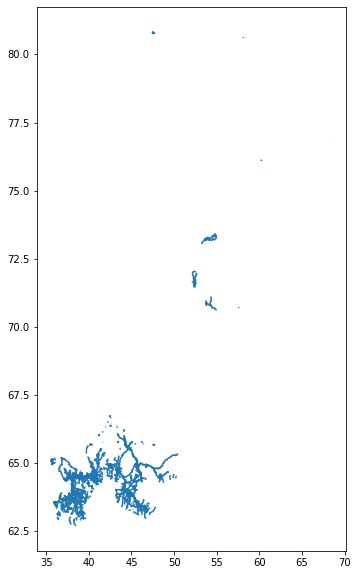

In [12]:
data.plot(figsize=(10,10))

### Рисуем конкретную дорогу с идентификатором 29271

<AxesSubplot:>

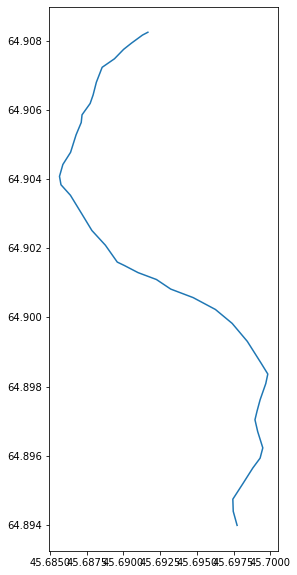

In [13]:
data[data.OBJECTID == 29271].plot(figsize=(10,10))

In [14]:
# Выборка по ID объектов
data.OBJECTID

0          29271
1          37927
2          37987
3          37993
4          38156
           ...  
103344    861098
103345    861099
103346    861100
103347    861101
103348    861102
Name: OBJECTID, Length: 103349, dtype: int64

### Предполагаем, что все кривые в одинаковом формате

Формат предположительно: [ [ [x, y], [x, y], [x, y] ... ] ]

In [41]:
all_res = []
data = auto_foot_graph_arh_obl

def convertToLense(objectid):
    part = data[data.OBJECTID == objectid]
    for _, row in part.iterrows():
        seq = row.geometry.geoms
        for coords in seq:
            x, y = coords.xy
            coords = pd.DataFrame()
            coords['x'] = x
            coords['y'] = y
            coords['curve'] = coords.apply(lambda d: [d[0], d[1]], axis=1)

            curveArr = []
            for _, curve in coords.iterrows():
                curveArr.append(curve['curve'])

            obj = {}
            obj['objectid'] = objectid
            obj['curve'] = [curveArr]

            obj['fclass'] = row.fclass
            obj['name'] = row.name
            obj['ref'] = row.ref
            obj['oneway'] = row.oneway
            obj['maxspeed'] = row.maxspeed
            obj['layer'] = row.layer
            obj['bridge'] = row.bridge
            obj['tunnel'] = row.tunnel
            obj['auto'] = row.auto
            obj['foot'] = row.foot
            obj['meters'] = row.meters
            obj['minutes'] = row.minutes
            obj['minutes_foot'] = row.minutes_foot

            all_res.append(obj)

objectids = data.OBJECTID
#objectids = [ 29271 ]
for objectid in objectids:
    convertToLense(objectid)

auto_foot_graph_arh_obl_df = pd.DataFrame(all_res)
data = auto_foot_graph_arh_obl_df
data

,objectid,curve,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,auto,foot,meters,minutes,minutes_foot
0,29271,"[[[5087051.2623, 9580496.953199998], [5087020....",bridleway,0,,B,0,0.0,F,F,N,Y,2060.383262,NaN,27.471777
1,37927,"[[[5088103.331599999, 9578659.178800002], [508...",bridleway,1,,B,0,0.0,F,F,N,Y,1947.084932,NaN,25.961132
2,37987,"[[[4435275.4767, 9470298.986199997], [4435303....",bridleway,2,,B,0,0.0,F,F,N,Y,161.128041,NaN,2.148374
3,37993,"[[[4436096.457899999, 9468934.917999998], [443...",bridleway,3,,B,0,0.0,F,F,N,Y,187.667672,NaN,2.502236
4,38156,"[[[5069061.186500002, 9589957.9432], [5069020....",bridleway,4,,B,0,0.0,F,F,N,Y,64415.091319,NaN,858.867884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103344,861098,"[[[6111561.204700001, 12246504.5841], [6111630...",unclassified,103344,,B,60,0.0,F,F,Y,Y,429.384133,0.429384,NaN
103345,861099,"[[[6111751.995200001, 12249894.595200002], [61...",unclassified,103345,,B,60,0.0,F,F,Y,Y,1060.710825,1.060711,NaN
103346,861100,"[[[6109750.715599999, 12252118.815300003], [61...",unclassified,103346,,B,60,0.0,F,F,Y,Y,795.592793,0.795593,NaN
103347,861101,"[[[6086765.823399998, 12266966.760799997], [60...",unclassified,103347,,B,60,0.0,F,F,Y,Y,2551.855248,2.551855,NaN


In [42]:
data.to_csv('data/auto_foot_graph_arh_obl_lense.csv', index=False)

In [44]:
data[0:100000].to_csv('data/auto_foot_graph_arh_obl_lense_head.csv', index=False)